## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:

## 1.Business Understanding

### Business Problem:

#### The company is looking to diversify by entering the commercial and private aviation industry. However, we lack knowledge about the risks associated with different aircraft

### Goal:

#### Our goal is to analyze historical aviation accident data to identify which aircraft are the lowest risk.And also give recommendations or guidance to their initial aircraft purchasing decisions.

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data Understanding

In [2]:
print("Loading the dataset to begin our analysis.....")

df = pd.read_csv('AviationData.csv',encoding='latin-1', low_memory=False)
print()
print("....Dataset loaded successfully......")

Loading the dataset to begin our analysis.....

....Dataset loaded successfully......


In [3]:
print("First 5 Rows of the dataset:")
df.head()

First 5 Rows of the dataset:


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
print("Dataset Information: (Columns, Data Types, Non-Null Counts)")
print()
df.info()

Dataset Information: (Columns, Data Types, Non-Null Counts)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 

In [5]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns as clearly seen above")

The dataset has 88889 rows and 31 columns as clearly seen above


In [6]:
print(f"The columns names associated with the aviation dataset are: \n{df.columns}")

The columns names associated with the aviation dataset are: 
Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')


In [7]:
#Now let's see how much data is missing
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
#Decided to create a dataframe that sorts the columns according to the number of values missing
#and their percentage
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
# Print columns with missing values, sorted
print(f"Below we are be able to see what each column misses in terms of values and percentage: \n{missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)}")

Below we are be able to see what each column misses in terms of values and percentage: 
                        Missing Values  Percentage
Schedule                         76307   85.845268
Air.carrier                      72241   81.271023
FAR.Description                  56866   63.974170
Aircraft.Category                56602   63.677170
Longitude                        54516   61.330423
Latitude                         54507   61.320298
Airport.Code                     38640   43.469946
Airport.Name                     36099   40.611324
Broad.phase.of.flight            27165   30.560587
Publication.Date                 13771   15.492356
Total.Serious.Injuries           12510   14.073732
Total.Minor.Injuries             11933   13.424608
Total.Fatal.Injuries             11401   12.826109
Engine.Type                       7077    7.961615
Report.Status                     6381    7.178616
Purpose.of.flight                 6192    6.965991
Number.of.Engines                 6084    6.8

In [8]:
#Let's look at the statistics of the numerical columns

print("Summary Statistics for Numerical Columns:")
df.describe()

Summary Statistics for Numerical Columns:


,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [9]:
#Statistics for the categorical columns
print("Summary statistics of the categorical columns:")
df.describe(include = "O")

Summary statistics of the categorical columns:


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,34382,34373,50249,52790,...,88787,81812,32023,12582,82697,16648,84397,61724,82508,75118
unique,87951,2,88863,14782,27758,219,25589,27154,10375,24871,...,2,13,31,3,26,13590,4,12,17075,2924
top,20001214X45071,Accident,ERA22FA318,1984-06-30,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,...,No,Reciprocating,091,NSCH,Personal,Pilot,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,...,80312,69530,18221,4474,49448,258,77303,15428,61754,17019


In [10]:
#Checking for duplicates in the dataset
print(f"There are {df.duplicated().sum()} duplicated values in this dataset")

There are 0 duplicated values in this dataset


## 3. Data Preparation

### 1. Data Cleaning

In [11]:
#Made a copy of the original data to clean
df1 = df.copy()

In [12]:
#Current column name formart
df1.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [13]:
#The column names seem to be in different formats...we need to change that
#the names need to have the same format for easy analysis
df1.columns = [name.strip().replace(".", "_").lower() for name in df1.columns]

print(f"The formated column names are: \n{df1.columns}")

The formated column names are: 
Index(['event_id', 'investigation_type', 'accident_number', 'event_date',
       'location', 'country', 'latitude', 'longitude', 'airport_code',
       'airport_name', 'injury_severity', 'aircraft_damage',
       'aircraft_category', 'registration_number', 'make', 'model',
       'amateur_built', 'number_of_engines', 'engine_type', 'far_description',
       'schedule', 'purpose_of_flight', 'air_carrier', 'total_fatal_injuries',
       'total_serious_injuries', 'total_minor_injuries', 'total_uninjured',
       'weather_condition', 'broad_phase_of_flight', 'report_status',
       'publication_date'],
      dtype='object')


In [14]:
#Get rid of the columns that hold no importance in the analysis

columns_to_drop = ['event_id','accident_number','latitude','longitude','airport_code','airport_name','registration_number','model','aircraft_category'
                   ,'far_description','schedule','air_carrier','report_status','publication_date','broad_phase_of_flight']

df1.drop(columns=columns_to_drop,axis=1,inplace=True)

print(f"There are {len(df1.columns)} remaining columns and they are: \n{df1.columns}")

There are 16 remaining columns and they are: 
Index(['investigation_type', 'event_date', 'location', 'country',
       'injury_severity', 'aircraft_damage', 'make', 'amateur_built',
       'number_of_engines', 'engine_type', 'purpose_of_flight',
       'total_fatal_injuries', 'total_serious_injuries',
       'total_minor_injuries', 'total_uninjured', 'weather_condition'],
      dtype='object')


In [15]:
#Get a clear picture of the remaining columns' missing values

print(f"The number of null values in each column and their corresponding datatypes:")

pd.DataFrame({'Null Count':df1.isnull().sum(),'Data Type':df1.dtypes})

The number of null values in each column and their corresponding datatypes:


,Null Count,Data Type
investigation_type,0,object
event_date,0,object
location,52,object
country,226,object
injury_severity,1000,object
aircraft_damage,3194,object
make,63,object
amateur_built,102,object
number_of_engines,6084,float64
engine_type,7077,object


In [16]:
#Change the format of dates under 'event_date' to be in right format
#And also extract the month and year
df1['event_date'] = pd.to_datetime(df1['event_date'])
df1['month'] = df1['event_date'].dt.month
df1['year'] = df1['event_date'].dt.year

In [17]:
#Check the Value counts for each column to know what action to take for the missing values
#Create a function that returns unique values and counts them
def column_value_counts(df,col):
    for i in col:
        print(f"\nColumn Name: {i}")
        print(df[i].value_counts())
        print("------------")
        print()


In [18]:
#Calling the fucntion
column_value_counts(df1,list(df1.columns))


Column Name: investigation_type
Accident    85015
Incident     3874
Name: investigation_type, dtype: int64
------------


Column Name: event_date
1982-05-16    25
1984-06-30    25
2000-07-08    25
1983-06-05    24
1983-08-05    24
              ..
2020-03-23     1
2013-12-10     1
2014-11-06     1
2013-08-19     1
2016-12-22     1
Name: event_date, Length: 14782, dtype: int64
------------


Column Name: location
ANCHORAGE, AK              434
MIAMI, FL                  200
ALBUQUERQUE, NM            196
HOUSTON, TX                193
CHICAGO, IL                184
                          ... 
Cotopaxi Volcano, Spain      1
Nanded, India                1
LAKELANIER ISL., GA          1
Middle Grove, NY             1
GALEVILLE, NY                1
Name: location, Length: 27758, dtype: int64
------------


Column Name: country
United States     82248
Brazil              374
Canada              359
Mexico              358
United Kingdom      344
                  ...  
Malampa           

In [19]:
#The location columns seems to have different format for every value in each row
#we need to have similar format
#change everything under location to upper
df1['location'] =df1['location'].str.upper()

In [20]:
#The 'injury_severity' column seems to have different format too
#remove the brackets and get the name 'fatal' alone
df1['injury_severity'] = df1['injury_severity'].str.split('(').str[0]

In [21]:
#Reduce the other unique values other than 'fatal' and 'non-fatal' to non-fatal
df1.loc[(df1['injury_severity'] != 'Non-Fatal') & (df1['injury_severity'] != 'Incident'),'injury_severity'] = 'Fatal'
df1.loc[(df1['injury_severity'] == "Incident"), 'injury_severity'] = 'Fatal'
df1['injury_severity'].value_counts()

Non-Fatal    67357
Fatal        21532
Name: injury_severity, dtype: int64

In [22]:
#The column 'make' also has different formatted values...standardize the column
df1['make'] = df1['make'].str.upper()

In [23]:
#The column 'engine_type' also need to be standardized and replace the none,unk to unknown
df1['engine_type'] = df1['engine_type'].str.lower().replace(['unk','none'],'unknown')

In [24]:
#The column 'weather_condition' also need starndadisation
df1['weather_condition'] = df1['weather_condition'].str.upper()

In [25]:
#Now let's look if all the values in each column have been standardized
column_value_counts(df1,list(df1.columns))


Column Name: investigation_type
Accident    85015
Incident     3874
Name: investigation_type, dtype: int64
------------


Column Name: event_date
1982-05-16    25
1984-06-30    25
2000-07-08    25
1983-06-05    24
1983-08-05    24
              ..
2020-03-23     1
2013-12-10     1
2014-11-06     1
2013-08-19     1
2016-12-22     1
Name: event_date, Length: 14782, dtype: int64
------------


Column Name: location
ANCHORAGE, AK       548
MIAMI, FL           275
HOUSTON, TX         271
ALBUQUERQUE, NM     265
CHICAGO, IL         256
                   ... 
HARRISONBURG, LA      1
PIEDMONT, MO          1
MOSS BEACH, CA        1
POYGEN, WI            1
LINCH, WY             1
Name: location, Length: 21978, dtype: int64
------------


Column Name: country
United States     82248
Brazil              374
Canada              359
Mexico              358
United Kingdom      344
                  ...  
Malampa               1
French Guiana         1
Ivory Coast           1
Nauru                 1

In [26]:
#The 'year' column needs to be edited
#Remove the years before 1982
df1.sort_values(by='year')
df1 = df1[df1['year']>=1982]
df1 = df1.reset_index(drop=True)

In [27]:
#Filling in the values for the categorical data with 'Unknown'
#While keeping in mind the data already filled as unknown or unk in weather and engine type column
df1['make'].fillna('Unknown',inplace=True)
df1['aircraft_damage'].fillna('Unknown',inplace=True)
df1['purpose_of_flight'].fillna('Unknown',inplace=True)
df1['weather_condition'].fillna('UNK',inplace=True)
df1['engine_type'].fillna('unknown',inplace=True)
df1['injury_severity'].fillna('Unavailable',inplace=True)

In [28]:
#For the numerical the best value to fill the null places is the mode
df1['number_of_engines'].fillna(value=(df1['number_of_engines'].mode()[0]), inplace=True)
df1['total_fatal_injuries'].fillna(value=(df1['total_fatal_injuries'].mode()[0]), inplace=True)
df1['total_serious_injuries'].fillna(value=(df1['total_serious_injuries'].mode()[0]), inplace=True)
df1['total_minor_injuries'].fillna(value=(df1['total_minor_injuries'].mode()[0]), inplace=True)
df1['total_uninjured'].fillna(value=(df1['total_uninjured'].mode()[0]), inplace=True)

In [29]:
#Main focus is on injury severity
#Remove rows which do not have information about injury
df1 = df1[df1['injury_severity'] != 'Unavailable']

In [30]:
#USA contains 93% of this dataset therefore let's focus on it
df1 = df1[df1['country']=='United States']

In [31]:
#Let's see if there are still null values in country
df1.isnull().sum()

investigation_type         0
event_date                 0
location                  11
country                    0
injury_severity            0
aircraft_damage            0
make                       0
amateur_built             21
number_of_engines          0
engine_type                0
purpose_of_flight          0
total_fatal_injuries       0
total_serious_injuries     0
total_minor_injuries       0
total_uninjured            0
weather_condition          0
month                      0
year                       0
dtype: int64

In [32]:
#Amazing....for the location and amateur built let's drop the empty rows
df1.dropna(subset=['location','amateur_built'],inplace=True)

In [33]:
#Clarification of what has been done above
df1.isnull().sum()

investigation_type        0
event_date                0
location                  0
country                   0
injury_severity           0
aircraft_damage           0
make                      0
amateur_built             0
number_of_engines         0
engine_type               0
purpose_of_flight         0
total_fatal_injuries      0
total_serious_injuries    0
total_minor_injuries      0
total_uninjured           0
weather_condition         0
month                     0
year                      0
dtype: int64

## Exploratory Data Analysis
### 1. Univariate Data Analysis

#### Accident Frequency by Manufacturer

In [34]:
print("Analyzing Accident Frequency by Aircraft Manufacturer....")

make_counts = df1['make'].value_counts()
top_15_make = make_counts.head(15)

print("\nTop 15 Manufacturer by Total Accidents\n")
print(top_15_make)

Analyzing Accident Frequency by Aircraft Manufacturer....

Top 15 Manufacturer by Total Accidents

CESSNA         25842
PIPER          14163
BEECH           5057
BELL            2283
BOEING          1482
MOONEY          1292
GRUMMAN         1142
BELLANCA        1040
ROBINSON         919
HUGHES           874
SCHWEIZER        744
AIR TRACTOR      644
AERONCA          634
MAULE            577
CHAMPION         514
Name: make, dtype: int64


In [35]:
#Combine the 'total_serious_injuries' and 'total_minor_injuries' to a new column and name it 'total_injuries'
#Get rid of the two columns
df1['total_injured'] = df1['total_serious_injuries'] + df1['total_minor_injuries']
del df1['total_serious_injuries']
del df1['total_minor_injuries']

In [36]:
#create a dataframe to hold only for the top 15 make
top_15_make = df1[df1['make'].isin(top_15_make.index.tolist())]
top_15_make

,investigation_type,event_date,location,country,injury_severity,aircraft_damage,make,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_uninjured,weather_condition,month,year,total_injured
0,Accident,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,CESSNA,No,1.0,reciprocating,Personal,0.0,2.0,VMC,1,1982,0.0
1,Accident,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,CESSNA,No,2.0,reciprocating,Business,0.0,2.0,IMC,1,1982,0.0
3,Accident,1982-01-01,"HOBBS, NM",United States,Non-Fatal,Substantial,PIPER,No,1.0,reciprocating,Personal,0.0,1.0,VMC,1,1982,0.0
4,Accident,1982-01-01,"TUSKEGEE, AL",United States,Non-Fatal,Substantial,BEECH,No,1.0,reciprocating,Personal,0.0,1.0,VMC,1,1982,0.0
5,Accident,1982-01-02,"HOMER, LA",United States,Non-Fatal,Destroyed,BELLANCA,No,1.0,reciprocating,Personal,0.0,0.0,IMC,1,1982,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88874,Accident,2022-12-21,"AUBURN HILLS, MI",United States,Fatal,Unknown,CESSNA,No,1.0,unknown,Personal,0.0,0.0,UNK,12,2022,1.0
88877,Accident,2022-12-26,"ANNAPOLIS, MD",United States,Fatal,Unknown,PIPER,No,1.0,unknown,Personal,0.0,0.0,UNK,12,2022,1.0
88878,Accident,2022-12-26,"HAMPTON, NH",United States,Fatal,Unknown,BELLANCA,No,1.0,unknown,Unknown,0.0,0.0,UNK,12,2022,0.0
88880,Accident,2022-12-26,"MORGAN, UT",United States,Fatal,Unknown,CESSNA,No,1.0,unknown,Personal,0.0,0.0,UNK,12,2022,0.0


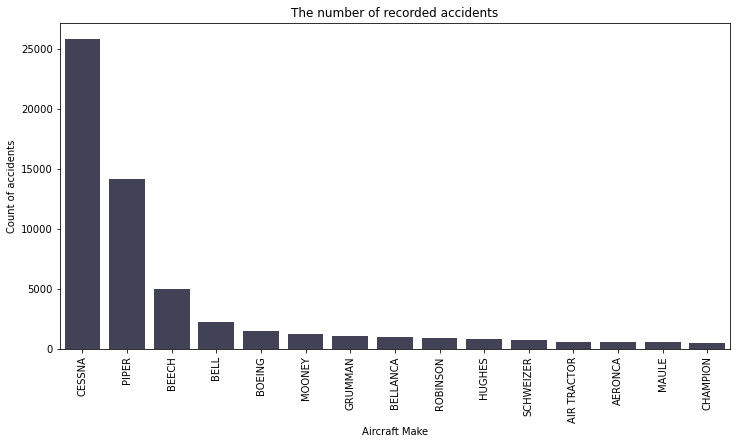

In [37]:
plt.figure(figsize=(12, 6))
sns.countplot(x = 'make', order = top_15_make['make'].value_counts().index, color = '#3E3F5B', data = top_15_make)
plt.title('The number of recorded accidents')
plt.ylabel('Count of accidents') 
plt.xlabel('Aircraft Make')
plt.xticks(rotation=90)
plt.show()

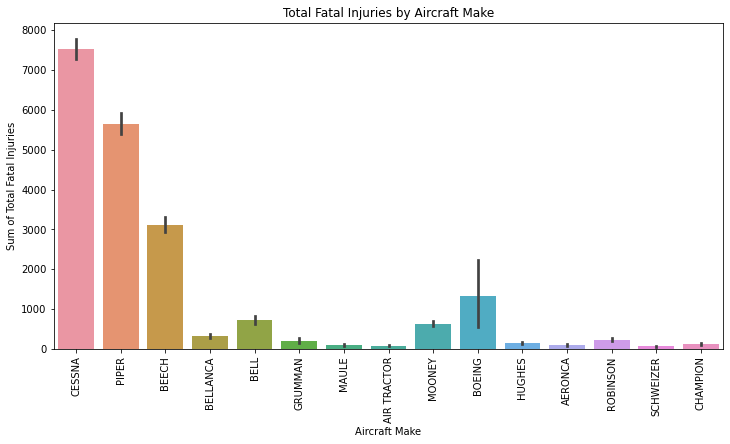

In [38]:
plt.figure(figsize=(12, 6))
sns.barplot(x='make', y = 'total_fatal_injuries', data=top_15_make, estimator=sum)
plt.title('Total Fatal Injuries by Aircraft Make')
plt.ylabel('Sum of Total Fatal Injuries') 
plt.xlabel('Aircraft Make')
plt.xticks(rotation=90)
plt.show()

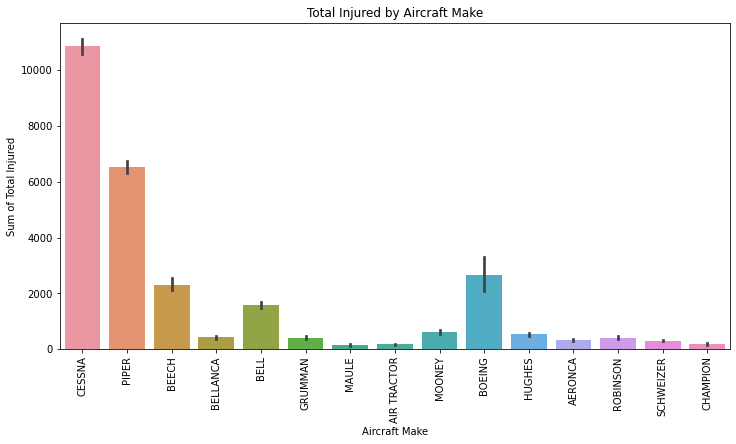

In [39]:
plt.figure(figsize=(12, 6))
sns.barplot(x='make', y = 'total_injured', data=top_15_make, estimator=sum)
plt.title('Total Injured by Aircraft Make')
plt.ylabel('Sum of Total Injured') 
plt.xlabel('Aircraft Make')
plt.xticks(rotation=90)
plt.show()

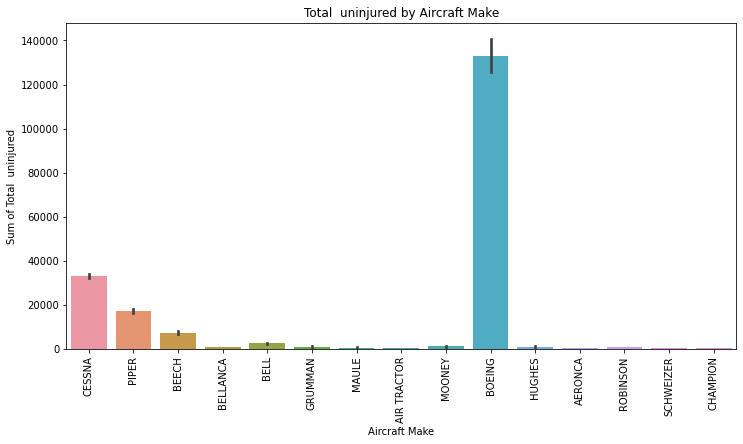

In [40]:
plt.figure(figsize=(12, 6))
sns.barplot(x='make', y = 'total_uninjured', data=top_15_make, estimator=sum)
plt.title('Total  uninjured by Aircraft Make')
plt.ylabel('Sum of Total  uninjured') 
plt.xlabel('Aircraft Make')
plt.xticks(rotation=90)
plt.show()

#### Accident Frequency by Location

In [41]:
df1['state'] = df1['location'].str.split(',').str[0]
del df1['location']

In [42]:
print("Analyzing Accident Frequency by State....")

state_counts = df1['state'].value_counts()
top_15_states = state_counts.head(15)

print("\nTop 15 States by Total Accidents\n")
print(top_15_states)

Analyzing Accident Frequency by State....

Top 15 States by Total Accidents

ANCHORAGE       548
HOUSTON         283
MIAMI           283
ALBUQUERQUE     265
CHICAGO         256
FAIRBANKS       246
PHOENIX         224
ATLANTA         210
DENVER          202
JACKSONVILLE    197
LAS VEGAS       197
TUCSON          196
RENO            179
SAN DIEGO       177
COLUMBUS        177
Name: state, dtype: int64


In [43]:
top_15_states = df1[df1['state'].isin(top_15_states.index.tolist())]
top_15_states 

,investigation_type,event_date,country,injury_severity,aircraft_damage,make,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_uninjured,weather_condition,month,year,total_injured,state
2,Accident,1982-01-01,United States,Non-Fatal,Substantial,NORTH AMERICAN,No,1.0,reciprocating,Personal,0.0,0.0,IMC,1,1982,3.0,JACKSONVILLE
12,Accident,1982-01-02,United States,Non-Fatal,Substantial,SMITH,No,1.0,reciprocating,Personal,0.0,2.0,VMC,1,1982,0.0,MIAMI
72,Incident,1982-01-12,United States,Fatal,Unknown,LOCKHEED,No,3.0,turbo fan,Unknown,0.0,149.0,UNK,1,1982,0.0,CHICAGO
98,Accident,1982-01-17,United States,Non-Fatal,Destroyed,CESSNA,No,1.0,reciprocating,Instructional,0.0,1.0,VMC,1,1982,1.0,ANCHORAGE
122,Accident,1982-01-19,United States,Non-Fatal,Substantial,CANADAIR,No,4.0,turbo prop,Unknown,0.0,6.0,VMC,1,1982,0.0,MIAMI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88765,Accident,2022-11-10,United States,Fatal,Unknown,BOEING,No,2.0,unknown,Unknown,0.0,147.0,UNK,11,2022,1.0,MIAMI
88788,Accident,2022-11-18,United States,Non-Fatal,Minor,ROBINSON HELICOPTER,No,1.0,unknown,Instructional,0.0,3.0,VMC,11,2022,0.0,LAS VEGAS
88789,Accident,2022-11-18,United States,Non-Fatal,Substantial,CESSNA,No,1.0,unknown,Instructional,0.0,3.0,VMC,11,2022,0.0,LAS VEGAS
88806,Accident,2022-11-22,United States,Non-Fatal,Substantial,SIKORSKY,No,2.0,unknown,Instructional,0.0,4.0,VMC,11,2022,0.0,SAN DIEGO


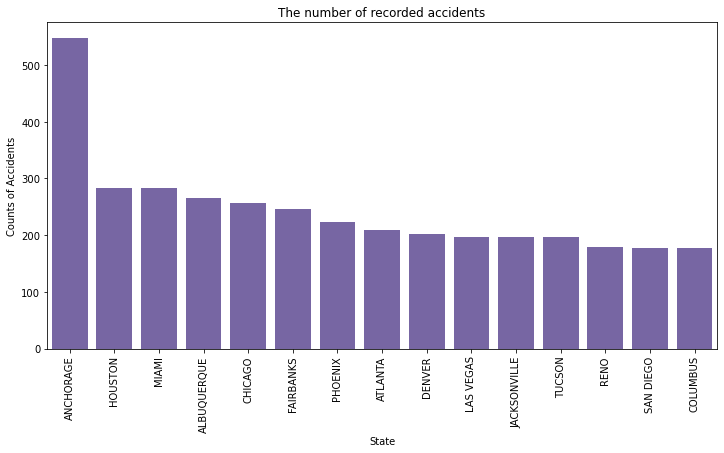

In [44]:
plt.figure(figsize=(12, 6))
sns.countplot(x = 'state', order = top_15_states['state'].value_counts().index, color = '#725CAD', data = top_15_states)
plt.xticks(rotation=90)
plt.ylabel('Counts of Accidents') 
plt.xlabel('State')
plt.title('The number of recorded accidents')
plt.show()

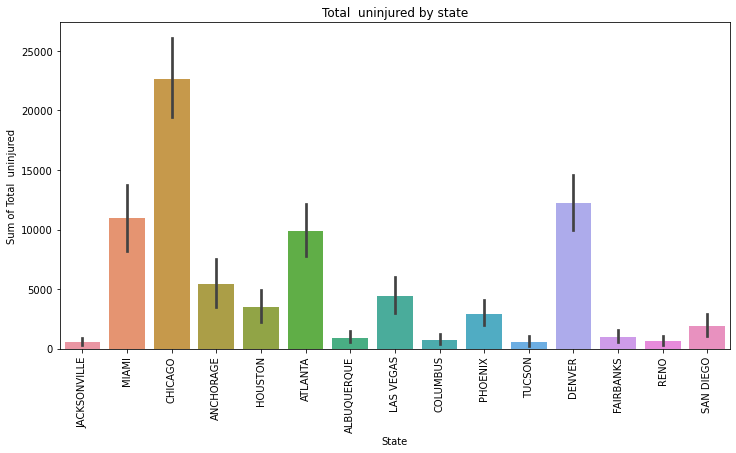

In [45]:
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y = 'total_uninjured', data=top_15_states, estimator=sum)
plt.title('Total  uninjured by state')
plt.ylabel('Sum of Total  uninjured') 
plt.xlabel('State')
plt.xticks(rotation=90)
plt.show()

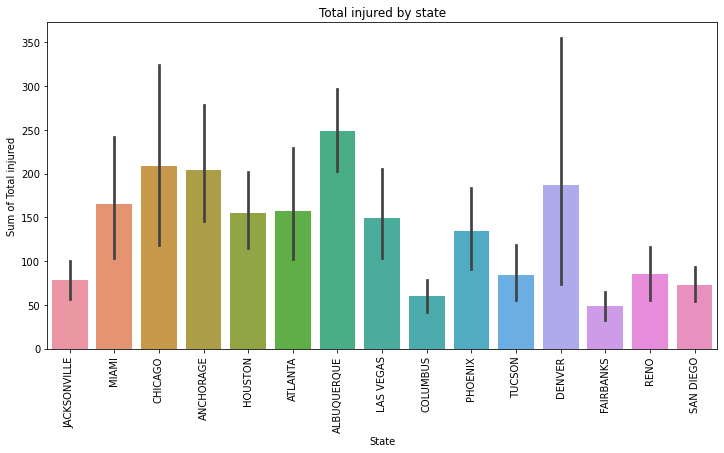

In [46]:
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y = 'total_injured', data=top_15_states, estimator=sum)
plt.title('Total injured by state')
plt.ylabel('Sum of Total injured') 
plt.xlabel('State')
plt.xticks(rotation=90)
plt.show()

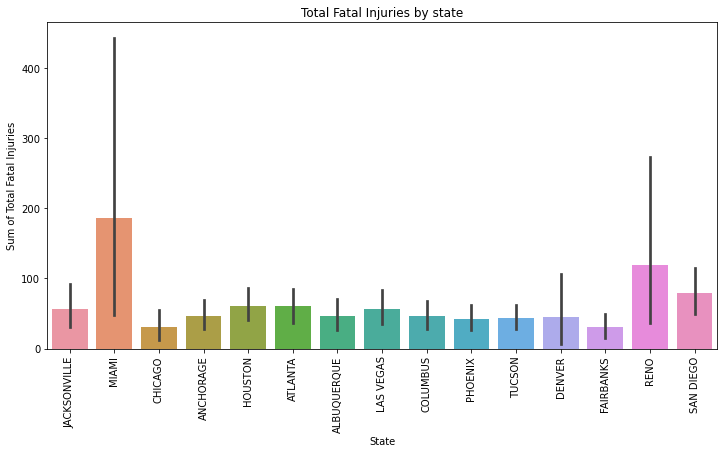

In [47]:
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y = 'total_fatal_injuries', data=top_15_states, estimator=sum)
plt.title('Total Fatal Injuries by state')
plt.ylabel('Sum of Total Fatal Injuries') 
plt.xlabel('State')
plt.xticks(rotation=90)
plt.show()

#### Accidents Frequency by month and year

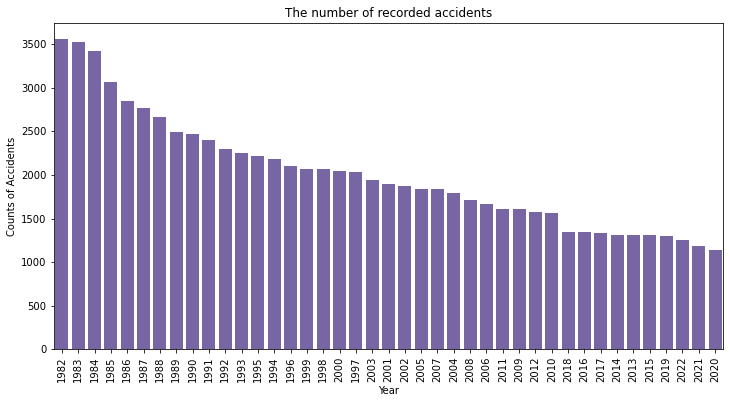

In [48]:
#Accidents frequency by year
plt.figure(figsize=(12, 6))
sns.countplot(x = 'year', order = df1['year'].value_counts().index, color = '#725CAD', data = df1)
plt.xticks(rotation=90)
plt.ylabel('Counts of Accidents') 
plt.xlabel('Year')
plt.title('The number of recorded accidents')
plt.show()

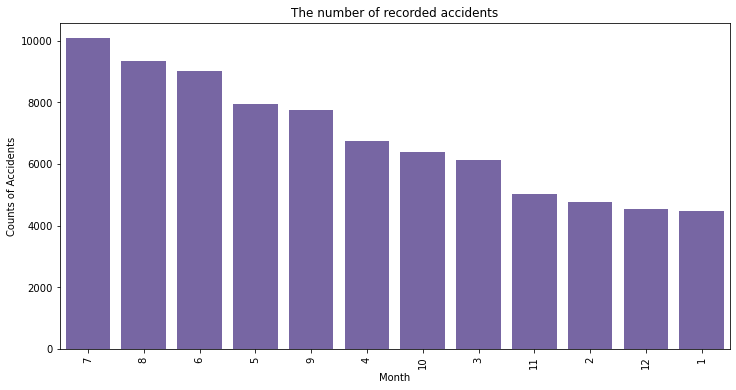

In [49]:
#Accidents frequency by month
plt.figure(figsize=(12, 6))
sns.countplot(x = 'month', order = df1['month'].value_counts().index, color = '#725CAD', data = df1)
plt.xticks(rotation=90)
plt.ylabel('Counts of Accidents') 
plt.xlabel('Month')
plt.title('The number of recorded accidents')
plt.show()

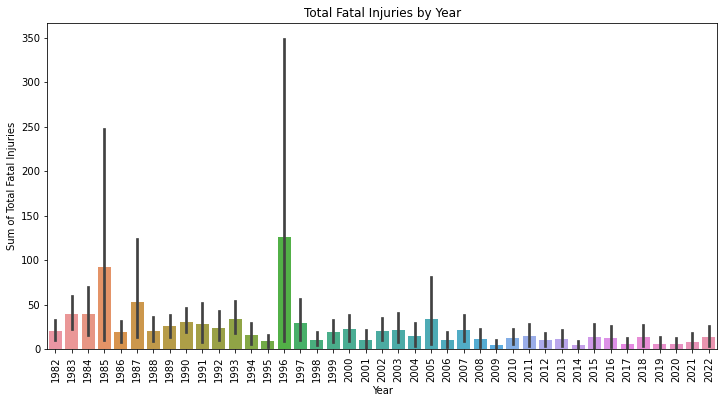

In [50]:
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y = 'total_fatal_injuries', data=top_15_states, estimator=sum)
plt.title('Total Fatal Injuries by Year')
plt.ylabel('Sum of Total Fatal Injuries') 
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.show()

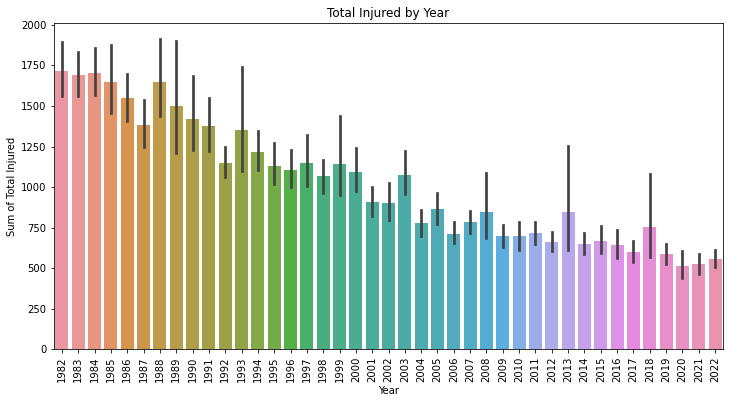

In [51]:
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y = 'total_injured', data=df1, estimator=sum)
plt.title('Total Injured by Year')
plt.ylabel('Sum of Total Injured') 
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.show()

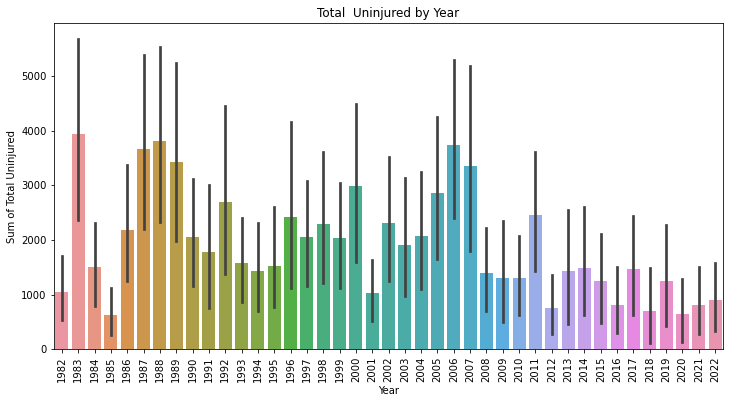

In [52]:
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y = 'total_uninjured', data=top_15_states, estimator=sum)
plt.title('Total  Uninjured by Year')
plt.ylabel('Sum of Total Uninjured') 
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.show()

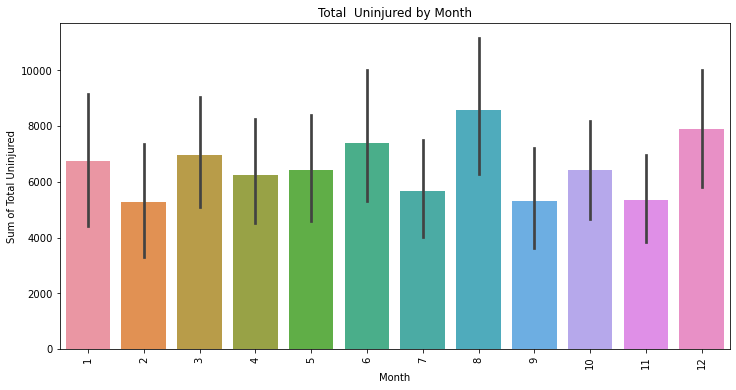

In [53]:
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y = 'total_uninjured', data=top_15_states, estimator=sum)
plt.title('Total  Uninjured by Month')
plt.ylabel('Sum of Total Uninjured') 
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.show()

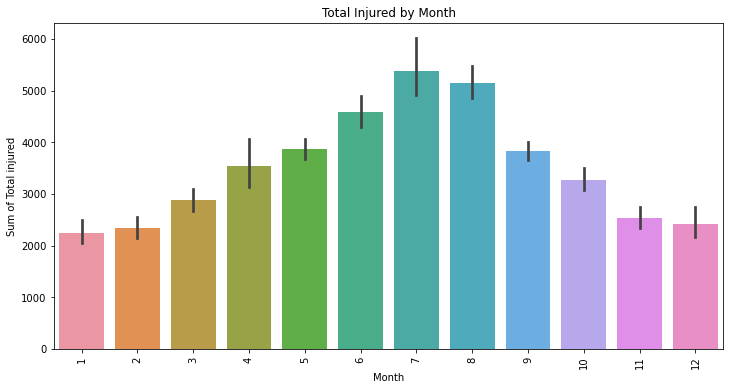

In [54]:
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y = 'total_injured', data=df1, estimator=sum)
plt.title('Total Injured by Month')
plt.ylabel('Sum of Total injured') 
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.show()

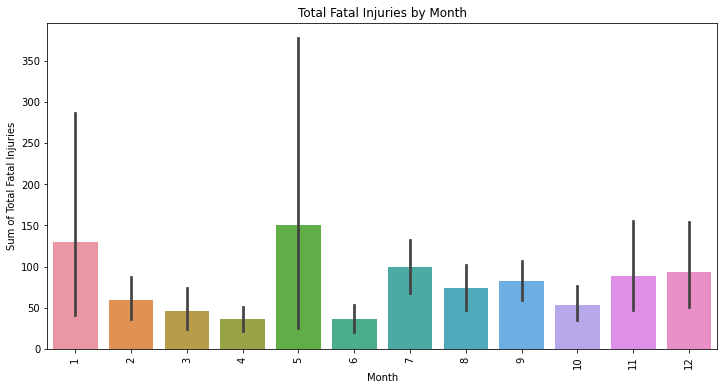

In [55]:
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y = 'total_fatal_injuries', data=top_15_states, estimator=sum)
plt.title('Total Fatal Injuries by Month')
plt.ylabel('Sum of Total Fatal Injuries') 
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.show()

#### Accident Frequency by Engine Type

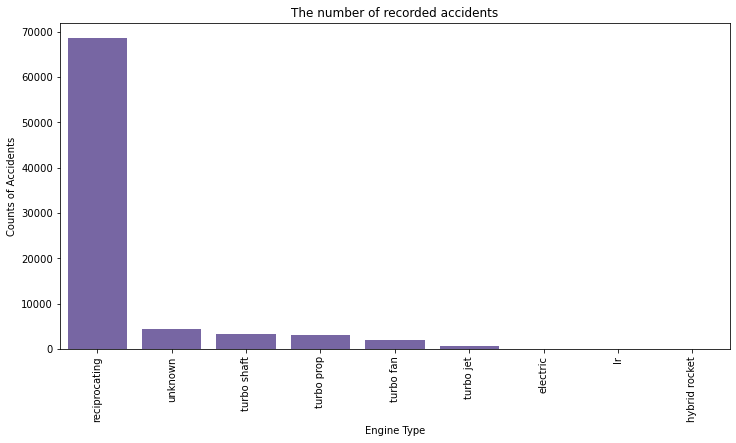

In [56]:
plt.figure(figsize=(12, 6))
sns.countplot(x = 'engine_type', order = df1['engine_type'].value_counts().index, color = '#725CAD', data = df1)
plt.xticks(rotation=90)
plt.ylabel('Counts of Accidents') 
plt.xlabel('Engine Type')
plt.title('The number of recorded accidents')
plt.show()

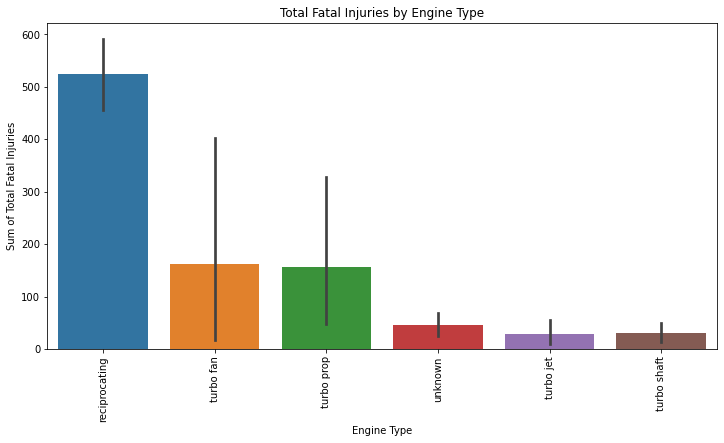

In [57]:
plt.figure(figsize=(12, 6))
sns.barplot(x='engine_type', y = 'total_fatal_injuries', data=top_15_states, estimator=sum)
plt.title('Total Fatal Injuries by Engine Type')
plt.ylabel('Sum of Total Fatal Injuries') 
plt.xlabel('Engine Type')
plt.xticks(rotation=90)
plt.show()

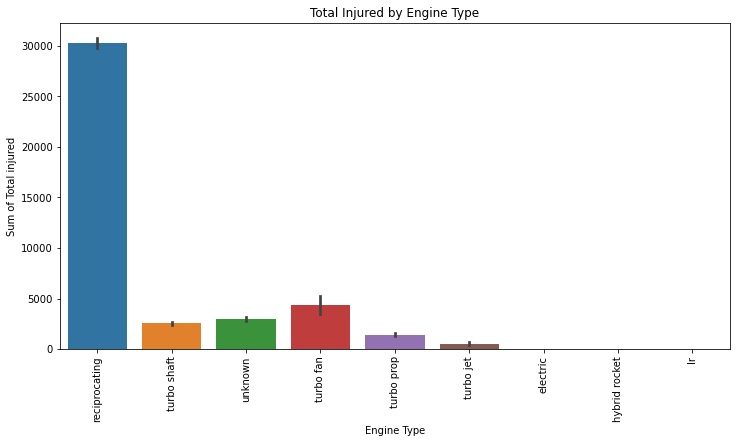

In [58]:
plt.figure(figsize=(12, 6))
sns.barplot(x='engine_type', y = 'total_injured', data=df1, estimator=sum)
plt.title('Total Injured by Engine Type')
plt.ylabel('Sum of Total injured') 
plt.xlabel('Engine Type')
plt.xticks(rotation=90)
plt.show()

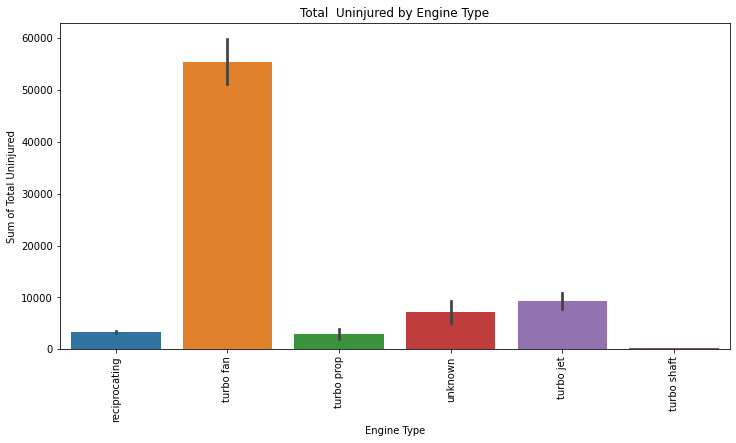

In [59]:
plt.figure(figsize=(12, 6))
sns.barplot(x='engine_type', y = 'total_uninjured', data=top_15_states, estimator=sum)
plt.title('Total  Uninjured by Engine Type')
plt.ylabel('Sum of Total Uninjured') 
plt.xlabel('Engine Type')
plt.xticks(rotation=90)
plt.show()

#### Accidents by Number of Engines

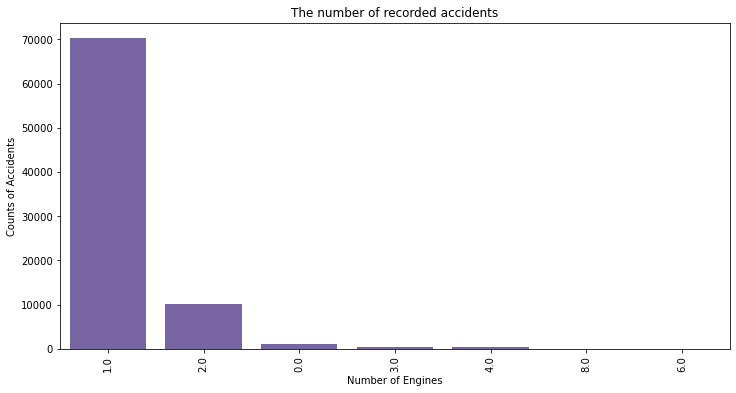

In [60]:
plt.figure(figsize=(12, 6))
sns.countplot(x = 'number_of_engines', order = df1['number_of_engines'].value_counts().index, color = '#725CAD', data = df1)
plt.xticks(rotation=90)
plt.ylabel('Counts of Accidents') 
plt.xlabel('Number of Engines')
plt.title('The number of recorded accidents')
plt.show()

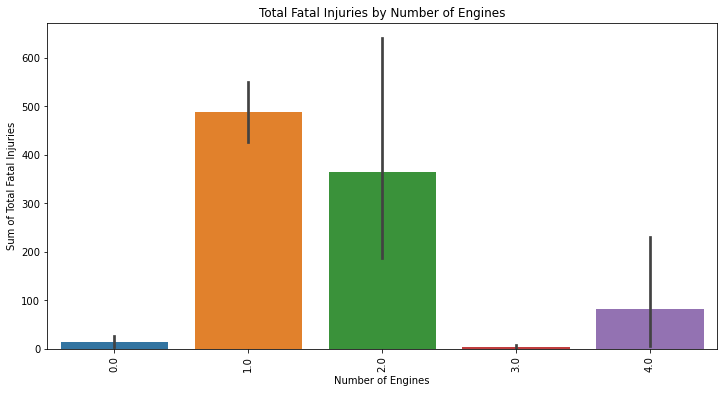

In [61]:
plt.figure(figsize=(12, 6))
sns.barplot(x='number_of_engines', y = 'total_fatal_injuries', data=top_15_states, estimator=sum)
plt.title('Total Fatal Injuries by Number of Engines')
plt.ylabel('Sum of Total Fatal Injuries') 
plt.xlabel('Number of Engines')
plt.xticks(rotation=90)
plt.show()

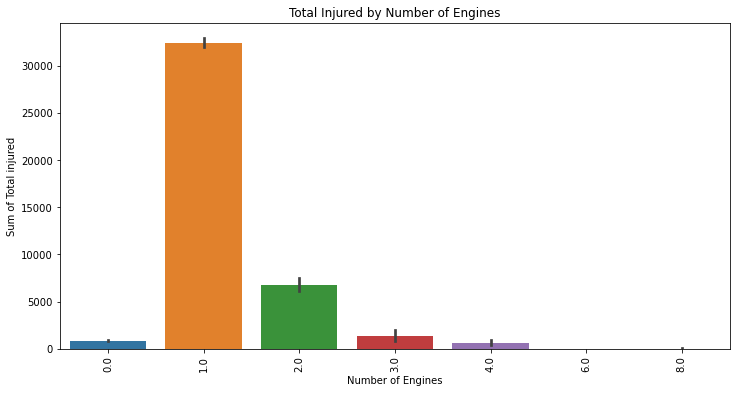

In [62]:
plt.figure(figsize=(12, 6))
sns.barplot(x='number_of_engines', y = 'total_injured', data=df1, estimator=sum)
plt.title('Total Injured by Number of Engines')
plt.ylabel('Sum of Total injured') 
plt.xlabel('Number of Engines')
plt.xticks(rotation=90)
plt.show()

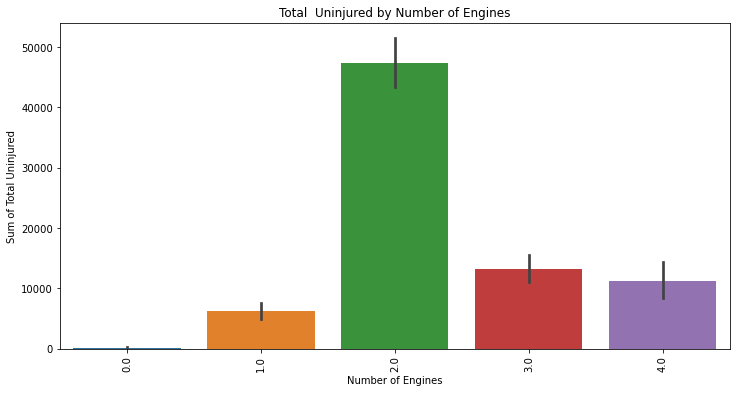

In [63]:
plt.figure(figsize=(12, 6))
sns.barplot(x='number_of_engines', y = 'total_uninjured', data=top_15_states, estimator=sum)
plt.title('Total  Uninjured by Number of Engines')
plt.ylabel('Sum of Total Uninjured') 
plt.xlabel('Number of Engines')
plt.xticks(rotation=90)
plt.show()

#### Accidents by Weather Condition

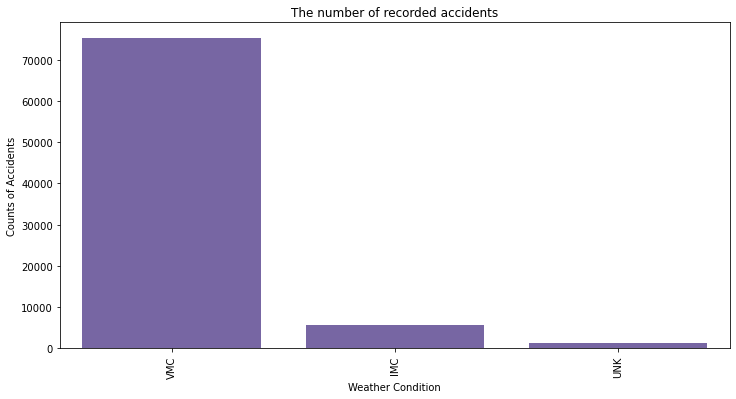

In [64]:
plt.figure(figsize=(12, 6))
sns.countplot(x = 'weather_condition', order = df1['weather_condition'].value_counts().index, color = '#725CAD', data = df1)
plt.xticks(rotation=90)
plt.ylabel('Counts of Accidents') 
plt.xlabel('Weather Condition')
plt.title('The number of recorded accidents')
plt.show()

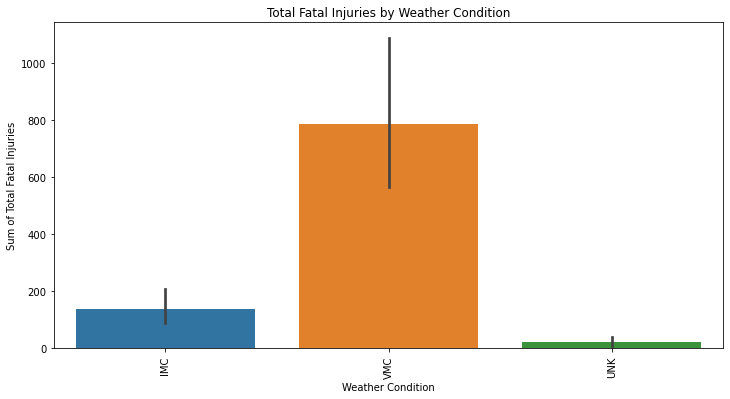

In [65]:
plt.figure(figsize=(12, 6))
sns.barplot(x='weather_condition', y = 'total_fatal_injuries', data=top_15_states, estimator=sum)
plt.title('Total Fatal Injuries by Weather Condition')
plt.ylabel('Sum of Total Fatal Injuries') 
plt.xlabel('Weather Condition')
plt.xticks(rotation=90)
plt.show()

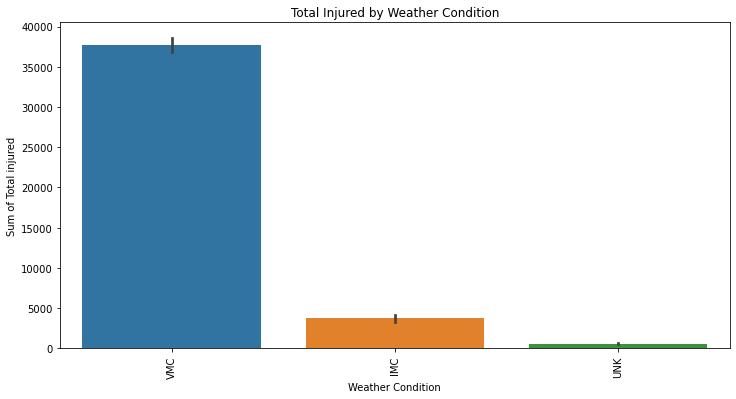

In [66]:
plt.figure(figsize=(12, 6))
sns.barplot(x='weather_condition', y = 'total_injured', data=df1, estimator=sum)
plt.title('Total Injured by Weather Condition')
plt.ylabel('Sum of Total injured') 
plt.xlabel('Weather Condition')
plt.xticks(rotation=90)
plt.show()

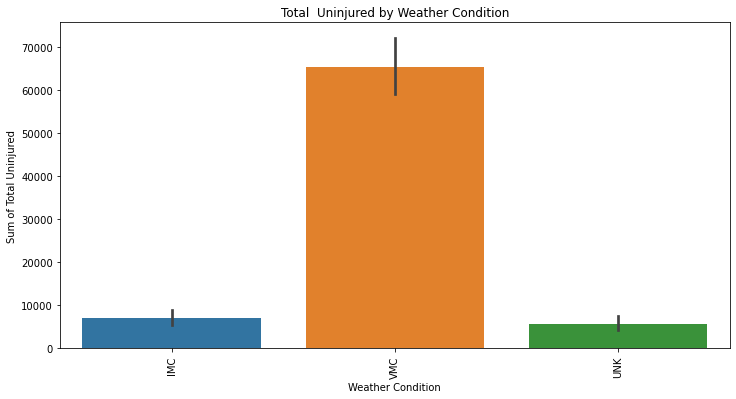

In [67]:
plt.figure(figsize=(12, 6))
sns.barplot(x='weather_condition', y = 'total_uninjured', data=top_15_states, estimator=sum)
plt.title('Total  Uninjured by Weather Condition')
plt.ylabel('Sum of Total Uninjured') 
plt.xlabel('Weather Condition')
plt.xticks(rotation=90)
plt.show()